In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Nos posicionamos en el directorio donde esta la tabla
#%cd "/content/drive/My Drive/Colab Notebooks/Capacitacion IA - ECOM/"
%cd "/content/drive/My Drive/Colab Notebooks/"

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [ ]:
file = "marketing_campaign.csv"

dataset = pd.read_csv(
    file,                       # Nombre o variable que contenga el archivo
    header=0,                   # Fila a emplear como nombre de columnas
    index_col=0,                # Columna a emplear como índice
    encoding='ISO-8859-1',      # El tipo de codificación a emplear para el parsing del archivo
    sep='\t',                    # Caracter empleado para separar campos
    na_values=' ',              # Strings adicionales que se emplean para detectar datos NaN
    low_memory=False            # Si está en verdadero, el archivo se lee en partes. Esto puede producir errores de tipos de datos.
)

In [ ]:
dataset.shape

(2240, 28)

In [ ]:
dataset.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,...,6,0,0,0,0,0,0,3,11,0
965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,...,6,0,0,0,0,0,0,3,11,0
6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,...,8,0,0,0,0,0,0,3,11,0
4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,...,9,0,0,0,0,0,0,3,11,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

In [ ]:
dataset.describe(include='all')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,26.302232,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


In [ ]:
dataset['Education'].describe

<bound method NDFrame.describe of ID
5524     Graduation
2174     Graduation
4141     Graduation
6182     Graduation
5324            PhD
            ...    
10870    Graduation
4001            PhD
7270     Graduation
8235         Master
9405            PhD
Name: Education, Length: 2240, dtype: object>

In [ ]:
#El nivel de Educación puede estar asociado a nivel de ingresos y nivel de consumo
dataset['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
#Valores de estado civil, para perfilar el tipo y nivel de consumo
dataset['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Histogrma de ingresos (Income).
Se observa que los valores representativos están por debajo de 200000, por lo que los valores superiores podrían desestimarse como outliers del objeto de estudio.

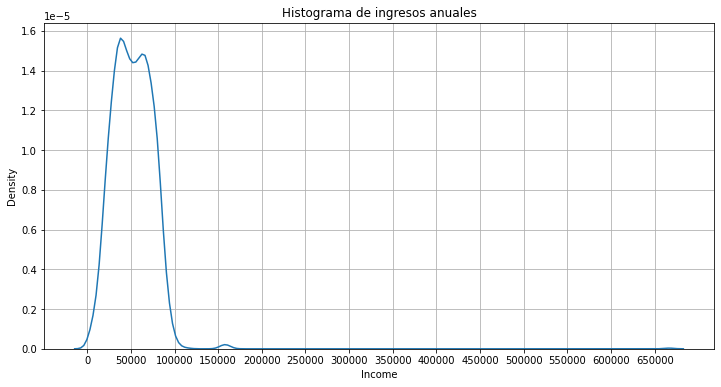

In [ ]:
#Histograma de ingresos
plt.figure(figsize=(12,6))
titulo='Histograma de ingresos anuales'
plt.title(titulo)
sns.kdeplot(dataset['Income'])
#plt.xticks(np.arange(dataset['Income'].min(),dataset['Income'].max(),step=50000))
plt.xticks(np.arange(0,dataset['Income'].max(),step=50000))
plt.grid(True)
plt.show()


 **Correlaciones**
 
Se estiman las correlaciones únicamente sobre datos numéricos del dataset, para determinar cuáles serían las variables más representativas.

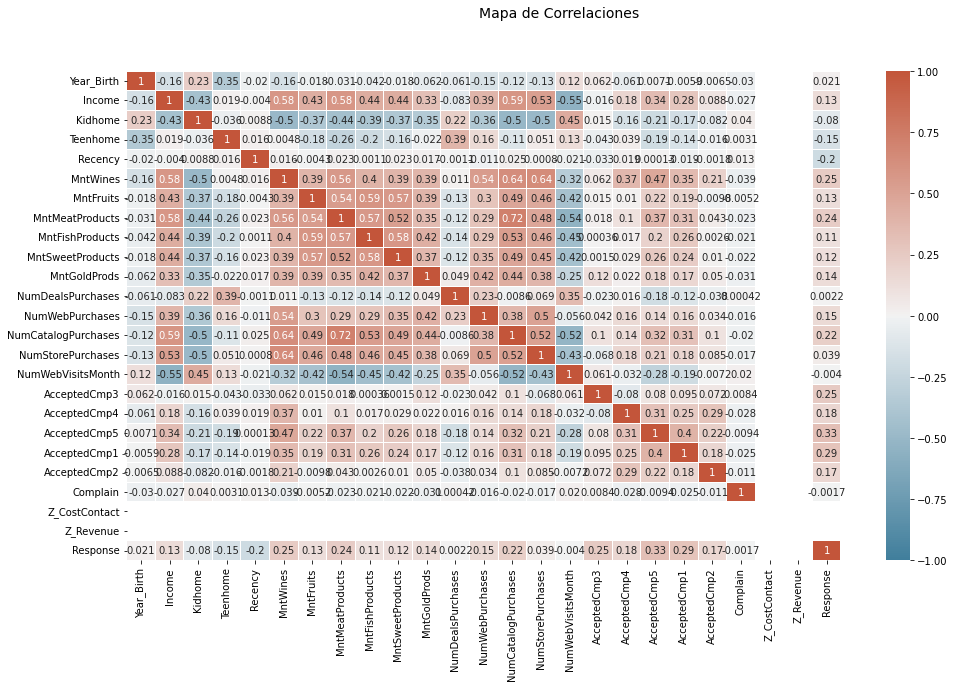

In [ ]:
#Correlaciones
plt.figure(figsize=(16, 9))
numData = dataset._get_numeric_data()    #Considera solo las columnas con datos numéricos
var_num_corr = numData.corr()            #Calcula la correlación por pares de series
#print(var_num_corr)
cmap = sns.diverging_palette(230,20,as_cmap=True)
mask = np.triu(var_num_corr)
sns.heatmap(var_num_corr,linewidth=0.01, linecolor='white', center=0, vmin=-1, vmax=1, annot=True, cmap=cmap)
plt.suptitle('Mapa de Correlaciones',fontsize=14)
plt.show()

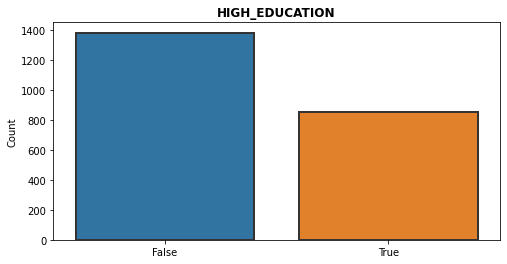

KeyError: ignored

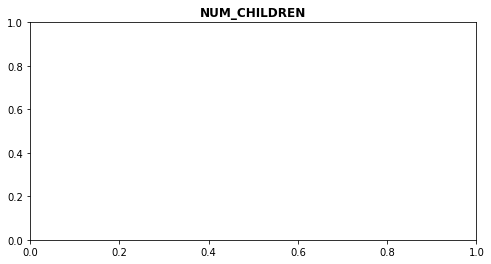

In [ ]:
# Separamos las columnas en grupos categóricos y numéricos
cat_columns = ['high_education','num_children', 'relationship', 'age_group']
num_columns = ['income', 'num_deals_purchases','total_spent','num_purchases', 
       'pct_purchases_with_discount', 'days_since_enrollment', 'pct_essentials']
# Graficamos los datos categóricos
for cat in cat_columns:
    plt.figure(figsize = (8,4))
    plt.title(str.upper(cat), fontweight = 'bold')
    aux = dataset.groupby(cat).size().reset_index()
    ax = sns.barplot(x=cat, data=aux, y = 0, linewidth=2, edgecolor=".2").set(ylabel="Count", xlabel = None)
    
    plt.show()

ValueError: ignored

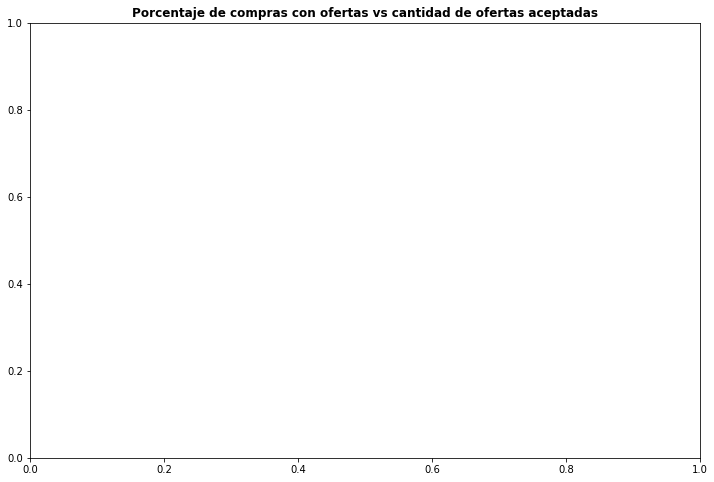

In [ ]:
# Graficamos la relación que existe entre la cantidad de ofertas aceptadas y el porcentaje

# Calculamos la sumatoria de las oferta aceptadas
dataset['accepted_sum'] = dataset['AcceptedCmp3'] + \
                          dataset['AcceptedCmp4'] + \
                          dataset['AcceptedCmp5'] + \
                          dataset['AcceptedCmp1'] + \
                          dataset['AcceptedCmp2']

# Preparamos el cuadro gráfico
plt.figure(figsize = (12,8))
plt.title('Porcentaje de compras con ofertas vs cantidad de ofertas aceptadas', fontweight = 'bold')
# Realizamos la gráfica de cajas
sns.boxplot(data = dataset, x = 'accepted_sum', y = 'pct_purchases_with_discount')
plt.xlabel('Ofertas Aceptadas')
plt.ylabel('Porcentaje de Compras con Ofertas')

plt.show()

In [ ]:
dataset['high_education']= dataset['Education'].isin(['PhD', 'Master'])


In [ ]:
#dataset[dataset['high_education'] == True]['high_education']
dataset.loc[:, ['Education', 'high_education']]

,Education,high_education
ID,,
5524,Graduation,False
2174,Graduation,False
4141,Graduation,False
6182,Graduation,False
5324,PhD,True
...,...,...
10870,Graduation,False
4001,PhD,True
7270,Graduation,False
